In [1]:
import pandas as pd
import numpy as np
import os
import json
import pandas_datareader.data as web   # my local kernel Python 3.10.7 
import matplotlib.pyplot as plt  # unavailable?  do: 1. pip uninstall matplotlib # 2. python3 -m pip install matplotlib
%matplotlib inline
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import datetime
import io
pd.set_option('display.max_columns', None)
# import warnings
import seaborn as sns
import scipy
from scipy import stats
# warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import talib as ta
import scipy
from scipy import stats
import mplfinance as mpf
# from library.sb_utils import save_file
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pd.set_option('display.max_rows', 30) 
pd.set_option('display.max_columns', 50)  # Display up to 50 columns
pd.set_option('display.max_colwidth',100)  # Display up to 100 characters per column value

# !pip install plotly
import plotly

# Up

In [11]:
# import glob
# cols = ['DateTime','volume','BidAsk','open','high','low','close']
# path = r"C:\Repo\U_55"                                 #    path =   "C:\Repo\R_65"
# all_files = glob.glob(path + "/*.csv")

# li = []

# for filename in all_files:
#     rNQrame = pd.read_csv(filename, names = cols, index_col= 0, header=0, parse_dates=True)
#     li.append(rNQrame)
    
frame_U = pd.concat(li, axis= 0, ignore_index= False)
frame_U.shape   #  (36460, 6)
frame_U['Up'] = 1
frame_U['Down'] = 0
frame_U['Range'] = 0
frame_U['RangeUp'] = 0
frame_U['RangeDown'] = 0
frame_U.head()
    

,volume,BidAsk,open,high,low,close,Up,Down,Range,RangeUp,RangeDown
DateTime,,,,,,,,,,,
2022-12-12 00:00:00,103,10,3965.00,3965.50,3965.00,3965.00,1,0,0,0,0
2022-12-12 00:02:00,145,-5,3965.00,3965.50,3965.00,3965.50,1,0,0,0,0
2022-12-12 00:04:00,105,2,3965.25,3966.00,3965.25,3965.25,1,0,0,0,0
2022-12-12 00:06:00,122,-36,3965.25,3965.75,3964.50,3964.75,1,0,0,0,0
2022-12-12 00:08:00,174,11,3964.75,3965.50,3964.50,3965.00,1,0,0,0,0


### Down

In [15]:
# cols = ['DateTime','volume','BidAsk','open','high','low','close']
# path = r"C:\Repo\D_47"                                 #    path =   "C:\Repo\R_65"
# all_files = glob.glob(path + "/*.csv")

# li2 = []

# for filename in all_files:
#     rNQrame = pd.read_csv(filename, names = cols, index_col= 0, header=0, parse_dates=True)
#     li2.append(rNQrame)
    
frame_D = pd.concat(li2, axis= 0, ignore_index= False)
frame_D.shape   #  (32087, 6)
frame_D['Up'] = 0
frame_D['Down'] = 1
frame_D['Range'] = 0
frame_D['RangeUp'] = 0
frame_D['RangeDown'] = 0
frame_D.head()

,volume,BidAsk,open,high,low,close,Up,Down,Range,RangeUp,RangeDown
DateTime,,,,,,,,,,,
2022-12-06 00:00:00,6,-2,4038.25,4038.25,4038.00,4038.00,0,1,0,0,0
2022-12-06 00:02:00,2,-2,4038.25,4038.25,4038.00,4038.00,0,1,0,0,0
2022-12-06 00:04:00,0,0,NaN,NaN,NaN,NaN,0,1,0,0,0
2022-12-06 00:06:00,1,1,4038.25,4038.25,4038.25,4038.25,0,1,0,0,0
2022-12-06 00:08:00,19,13,4039.50,4040.00,4039.50,4039.75,0,1,0,0,0


### Range

In [19]:
# cols = ['DateTime','volume','BidAsk','open','high','low','close']
# path = r"C:\Repo\R_61"                                
# all_files = glob.glob(path + "/*.csv")

# li3 = []

# for filename in all_files:
#     rNQrame = pd.read_csv(filename, names = cols, index_col= 0, header=0, parse_dates=True)
#     li3.append(rNQrame)
    
# frame_R = pd.concat(li3, axis= 0, ignore_index= False)
# frame_R.shape   #  (41317, 6)
frame_R['Up'] = 0
frame_R['Down'] = 0
frame_R['Range'] = 1
frame_R['RangeUp'] = 0
frame_R['RangeDown'] = 0
frame_R.head()

,volume,BidAsk,open,high,low,close,Up,Down,Range,RangeUp,RangeDown
DateTime,,,,,,,,,,,
2023-03-28 00:00:00,11,3,4013.75,4013.75,4013.50,4013.50,0,0,1,0,0
2023-03-28 00:02:00,111,11,4013.75,4014.25,4013.75,4014.00,0,0,1,0,0
2023-03-28 00:04:00,46,-28,4013.75,4014.00,4013.75,4013.75,0,0,1,0,0
2023-03-28 00:06:00,75,18,4013.75,4014.00,4013.75,4014.00,0,0,1,0,0
2023-03-28 00:08:00,55,2,4014.00,4014.00,4013.50,4013.75,0,0,1,0,0


### Range Down

In [21]:
# cols = ['DateTime','volume','BidAsk','open','high','low','close']
# path = r"C:\Repo\RD_41"                                
# all_files = glob.glob(path + "/*.csv")

# li4 = []

# for filename in all_files:
#     rNQrame = pd.read_csv(filename, names = cols, index_col= 0, header=0, parse_dates=True)
#     li4.append(rNQrame)
    
# frame_RD = pd.concat(li4, axis= 0, ignore_index= False)
# frame_RD.shape   #  (27943, 6)
frame_RD['Up'] = 0
frame_RD['Down'] = 0
frame_RD['Range'] = 0
frame_RD['RangeUp'] = 0
frame_RD['RangeDown'] = 1
frame_RD.head()

,volume,BidAsk,open,high,low,close,Up,Down,Range,RangeUp,RangeDown
DateTime,,,,,,,,,,,
2022-12-22 00:00:00,147,-21,3917.75,3918.00,3917.25,3918.00,0,0,0,0,1
2022-12-22 00:02:00,71,-2,3917.75,3918.00,3917.25,3917.50,0,0,0,0,1
2022-12-22 00:04:00,77,-8,3917.50,3917.75,3917.25,3917.25,0,0,0,0,1
2022-12-22 00:06:00,192,-56,3917.25,3917.50,3916.50,3916.50,0,0,0,0,1
2022-12-22 00:08:00,141,15,3916.50,3917.00,3916.25,3917.00,0,0,0,0,1


### Range Up

In [23]:
# cols = ['DateTime','volume','BidAsk','open','high','low','close']
# path = r"C:\Repo\RU_42"                                
# all_files = glob.glob(path + "/*.csv")

# li5 = []

# for filename in all_files:
#     rNQrame = pd.read_csv(filename, names = cols, index_col= 0, header=0, parse_dates=True)
#     li5.append(rNQrame)
    
# frame_RU = pd.concat(li5, axis= 0, ignore_index= False)
# frame_RU.shape   # (28690, 6)
frame_RU['Up'] = 0
frame_RU['Down'] = 0
frame_RU['Range'] = 0
frame_RU['RangeUp'] = 1
frame_RU['RangeDown'] = 0
frame_RU.head()

,volume,BidAsk,open,high,low,close,Up,Down,Range,RangeUp,RangeDown
DateTime,,,,,,,,,,,
2022-12-20 00:00:00,434,87,3813.75,3814.00,3812.25,3813.25,0,0,0,1,0
2022-12-20 00:02:00,291,40,3813.25,3813.75,3812.75,3813.25,0,0,0,1,0
2022-12-20 00:04:00,359,38,3813.25,3813.50,3812.25,3813.50,0,0,0,1,0
2022-12-20 00:06:00,660,259,3813.50,3816.00,3813.25,3815.00,0,0,0,1,0
2022-12-20 00:08:00,803,247,3814.75,3817.00,3814.25,3815.50,0,0,0,1,0


In [36]:
# all_frames = pd.concat([frame_RU,frame_RD, frame_R, frame_D, frame_U], ignore_index=False, sort=True)
# all_frames.shape   #(166497, 11)
all_frames.sample(3)

,BidAsk,Down,Range,RangeDown,RangeUp,Up,close,high,low,open,volume
DateTime,,,,,,,,,,,
2022-09-19 11:04:00,35,0,0,0,0,1,3898.75,3899.00,3895.50,3896.25,6322
2022-10-13 05:08:00,41,0,0,0,0,1,10866.25,10870.25,10865.25,10867.75,443
2023-02-06 13:40:00,-658,0,1,0,0,0,4117.50,4121.50,4117.25,4121.00,4939


In [37]:
# nq = all_frames[all_frames['close'] > 6000]
print('Nq is: ', nq.shape)
# es = all_frames[all_frames['close'] < 6000]
print('Es is ', es.shape)


Nq is:  (73473, 11)
Es is  (85338, 11)


In [42]:
es.sort_index(inplace=True)
es.info()
es.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85338 entries, 2022-09-19 00:00:00 to 2023-03-31 16:58:00
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BidAsk     85338 non-null  int64  
 1   Down       85338 non-null  int64  
 2   Range      85338 non-null  int64  
 3   RangeDown  85338 non-null  int64  
 4   RangeUp    85338 non-null  int64  
 5   Up         85338 non-null  int64  
 6   close      85338 non-null  float64
 7   high       85338 non-null  float64
 8   low        85338 non-null  float64
 9   open       85338 non-null  float64
 10  volume     85338 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 7.8 MB


c:\Users\tonya\anaconda3\envs\quantra_py\lib\site-packages\pandas\core\frame.py:5582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,BidAsk,Down,Range,RangeDown,RangeUp,Up,close,high,low,open,volume
count,85338.000000,85338.000000,85338.00000,85338.000000,85338.000000,85338.000000,85338.000000,85338.000000,85338.000000,85338.000000,85338.000000
mean,-1.230460,0.187126,0.26340,0.181596,0.159987,0.207891,3923.085366,3924.329469,3921.846171,3923.083858,2747.029471
std,359.545613,0.390015,0.44048,0.385513,0.366596,0.405801,137.096685,136.866615,137.315575,137.099800,4838.633301
min,-6858.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3504.750000,3509.250000,3502.000000,3504.500000,1.000000
25%,-62.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3840.750000,3842.000000,3839.250000,3840.750000,262.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3956.250000,3957.500000,3954.750000,3956.250000,689.000000
75%,63.000000,0.000000,1.00000,0.000000,0.000000,0.000000,4012.750000,4013.500000,4011.750000,4012.750000,3732.750000
max,5291.000000,1.000000,1.00000,1.000000,1.000000,1.000000,4206.500000,4208.500000,4205.500000,4206.500000,214439.000000


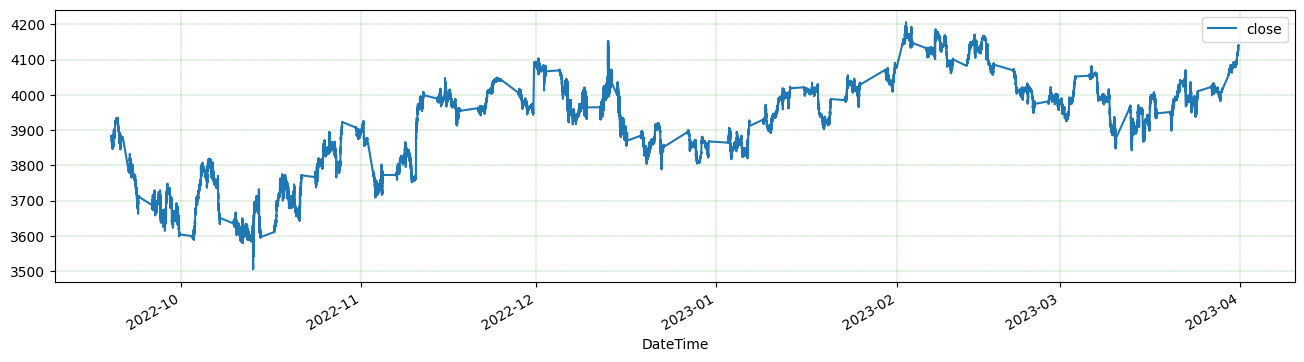

In [47]:
es.plot(y=['close'],figsize=(16,4))
# plt.axhline(y= 0, linewidth= 0.9, linestyle = '--', color='black', alpha=0.7)  
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2) 
plt.show()

In [41]:
nq.sort_index(inplace=True)
nq.info()
nq.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73473 entries, 2022-09-26 00:00:00 to 2023-03-31 16:58:00
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BidAsk     73473 non-null  int64  
 1   Down       73473 non-null  int64  
 2   Range      73473 non-null  int64  
 3   RangeDown  73473 non-null  int64  
 4   RangeUp    73473 non-null  int64  
 5   Up         73473 non-null  int64  
 6   close      73473 non-null  float64
 7   high       73473 non-null  float64
 8   low        73473 non-null  float64
 9   open       73473 non-null  float64
 10  volume     73473 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.7 MB


c:\Users\tonya\anaconda3\envs\quantra_py\lib\site-packages\pandas\core\frame.py:5582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,BidAsk,Down,Range,RangeDown,RangeUp,Up,close,high,low,open,volume
count,73473.000000,73473.000000,73473.000000,73473.000000,73473.000000,73473.000000,73473.000000,73473.000000,73473.000000,73473.000000,73473.000000
mean,-1.085719,0.199339,0.227090,0.154696,0.187307,0.231568,11773.524400,11778.263668,11768.796014,11773.499684,995.809086
std,189.668349,0.399506,0.418954,0.361617,0.390160,0.421837,610.761356,610.390020,611.096954,610.758205,1442.933068
min,-2845.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10507.750000,10516.750000,10484.750000,10507.750000,1.000000
25%,-41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11300.500000,11306.000000,11293.750000,11300.250000,136.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11686.500000,11691.250000,11682.750000,11686.500000,342.000000
75%,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12196.000000,12199.750000,12192.500000,12196.000000,1413.000000
max,2508.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13308.750000,13311.500000,13308.000000,13309.000000,24790.000000


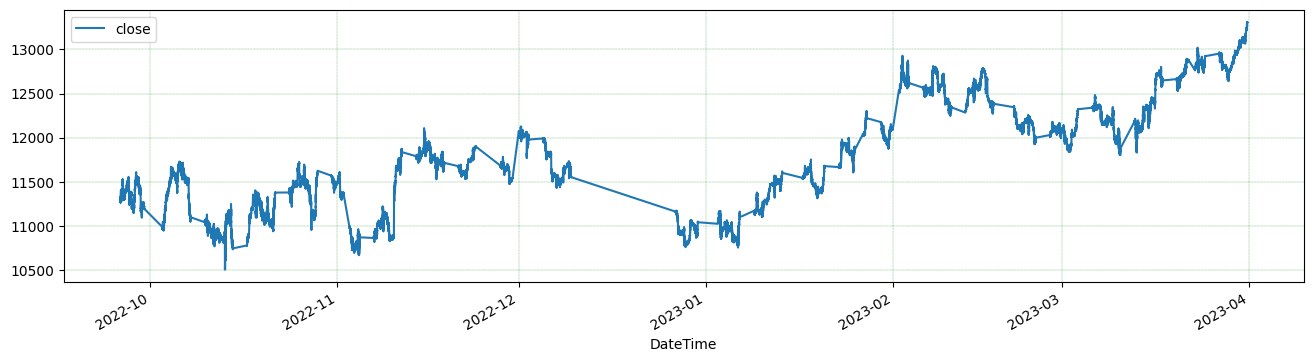

In [46]:
nq.plot(y=['close'],figsize=(16,4))
# plt.axhline(y= 0, linewidth= 0.9, linestyle = '--', color='black', alpha=0.7)  
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2) 
plt.show()

## Features Returns

In [48]:
# Returns
nq_ret = nq.copy()

nq_ret['ret1'] = nq_ret['close'].pct_change()
nq_ret['ret5'] = nq_ret.ret1.rolling(5).sum()

# Standard Deviation
nq_ret['std5'] = nq_ret.ret1.rolling(5).std()

# Volume by ADV20
nq_ret['volume_10'] = nq_ret['volume'] / nq_ret.volume.rolling(10).mean()

# High - low
nq_ret['H-L'] = nq_ret['high'] - nq_ret['low']

# Open - Close
nq_ret['O-C'] = nq_ret['close'] - nq_ret['open']

In [113]:
# Future returns
nq_ret['retFut1'] = nq_ret.ret1.shift(-40)

In [114]:
nq_ret.head()

,BidAsk,Down,Range,RangeDown,RangeUp,Up,close,high,low,open,volume,ret1,ret5,std5,volume_10,H-L,O-C,retFut1,predicted_signal,strategy_returns_nn,excess_daily_strategy_return
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-09-26 00:18:00,-28,0,1,0,0,0,11322.50,11325.50,11318.0,11325.00,102,-0.000221,0.000663,0.000326,0.571749,7.50,-2.50,-0.000222,0,0.000000,-0.000198
2022-09-26 00:20:00,4,0,1,0,0,0,11321.25,11323.25,11321.0,11321.25,74,-0.000110,0.000464,0.000344,0.442849,2.25,0.00,0.000222,1,0.000221,0.000023
2022-09-26 00:22:00,21,0,1,0,0,0,11325.25,11325.25,11319.5,11320.75,86,0.000353,0.000950,0.000333,0.579515,5.75,4.50,-0.000244,1,-0.000642,-0.000840
2022-09-26 00:24:00,-7,0,1,0,0,0,11325.75,11327.00,11322.5,11324.75,175,0.000044,0.000596,0.000315,1.320755,4.50,1.00,0.000133,0,-0.000000,-0.000198
2022-09-26 00:26:00,9,0,1,0,0,0,11326.25,11329.00,11323.5,11326.00,150,0.000044,0.000110,0.000216,1.170960,5.50,0.25,0.000954,1,-0.000664,-0.000863


In [115]:
nq_ret.shape  #(73463, 18)
nq_ret = nq_ret.dropna(axis=0)
nq_ret.shape  # (73433, 18)

(73393, 21)

# Applying NN CrossValidation on ES dataset

In [116]:
nq_ret.columns

Index(['BidAsk', 'Down', 'Range', 'RangeDown', 'RangeUp', 'Up', 'close',
       'high', 'low', 'open', 'volume', 'ret1', 'ret5', 'std5', 'volume_10',
       'H-L', 'O-C', 'retFut1', 'predicted_signal', 'strategy_returns_nn',
       'excess_daily_strategy_return'],
      dtype='object')

In [117]:
# Define predictor variables (X) and a target variable (y)

predictor_list = ['BidAsk', 'H-L', 'O-C', 'ret5', 'std5', 'volume_10']
X = nq_ret[predictor_list]

y = np.where(nq_ret.retFut1 > 0.0, 1, 0)
X.shape, y.shape

((73393, 6), (73393,))

In [118]:
# Split the data into train and test dataset
from sklearn.model_selection import train_test_split

train_length = int(len(nq_ret) * 0.80)

X_train = X[:train_length]
X_test = X[train_length:]

y_train = y[:train_length]
y_test = y[train_length:]

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Create the scaler model using train data
scaler.fit(X_train)

# Transform the training and test data using the scaler model created above
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Create a NN model

In [121]:
# Import the MLPClassifier
from sklearn.neural_network import MLPClassifier
#  MLPClassifier
# help(MLPClassifier)
#MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', 
# learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, 
# shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
# nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, 
# beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
  

In [122]:
# seed at 42
seed = 42
# Create the MLPClassifier model
# mlp = MLPClassifier(activation='logistic', hidden_layer_sizes=(5), random_state=seed, solver='sgd') # pretty bad: 
mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(1000), random_state=seed, solver='adam', verbose=True)# CAGR | 0.0372229 | 0.0856005 || Sharpe Ratio |-5.71395  | -7.65358 
mlp = MLPClassifier(activation='logistic', hidden_layer_sizes=(1000), random_state=seed, solver='adam', verbose=True)#
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(120), random_state=seed, solver='sgd', verbose=True)#

  

### Training the model

In [123]:
# Fit the model on train dataset
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.70303066
Iteration 2, loss = 0.69458198
Iteration 3, loss = 0.69404503
Iteration 4, loss = 0.69376321
Iteration 5, loss = 0.69357186
Iteration 6, loss = 0.69344029
Iteration 7, loss = 0.69332240
Iteration 8, loss = 0.69325253
Iteration 9, loss = 0.69317213
Iteration 10, loss = 0.69311309
Iteration 11, loss = 0.69305253
Iteration 12, loss = 0.69300914
Iteration 13, loss = 0.69296692
Iteration 14, loss = 0.69294617
Iteration 15, loss = 0.69290701
Iteration 16, loss = 0.69289140
Iteration 17, loss = 0.69286842
Iteration 18, loss = 0.69283413
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=120, random_state=42, solver='sgd',
              verbose=True)

In [ ]:
help(MLPClassifier)

### Predict using the neural network

In [124]:
nq_ret['predicted_signal'] = mlp.predict(X)
nq_ret['strategy_returns_nn'] = nq_ret.retFut1 * nq_ret.predicted_signal
nq_ret.tail(3)
nq_ret.sample(3)

,BidAsk,Down,Range,RangeDown,RangeUp,Up,close,high,low,open,volume,ret1,ret5,std5,volume_10,H-L,O-C,retFut1,predicted_signal,strategy_returns_nn,excess_daily_strategy_return
DateTime,,,,,,,,,,,,,,,,,,,,,
2023-03-08 15:56:00,-177,0,0,0,1,0,12223.0,12228.50,12220.00,12223.75,2889,-0.000061,-0.000940,0.000238,0.974368,8.5,-0.75,-0.000123,0,-0.0,-0.000198
2023-03-02 11:02:00,25,0,0,0,0,1,11925.0,11938.25,11918.25,11927.25,4717,-0.000168,0.000021,0.000418,1.374778,20.0,-2.25,0.000168,0,0.0,-0.000450
2022-10-10 11:08:00,-117,1,0,0,0,0,10948.0,10954.00,10941.50,10952.00,2202,-0.000388,-0.000340,0.001017,0.618609,12.5,-4.00,-0.000092,0,-0.0,-0.000198


### Performance of the neural network

In [125]:
# The function returns the Sharpe ratio for the excess returns (Strategy returns - Risk free rate) passed to it.
def annualized_sharpe_ratio(returns, N=252):
    return np.sqrt(N) * returns.mean() / returns.std()

### Strategy CAGR
- CAGR represents the compounded annual returns of the strategy
- (Cumulative returns)^(252/number of days) - 1

In [126]:
def CAGR(returns):
    cumulative_returns = (returns+1).cumprod().iloc[-1]
    period_in_days = len(returns)
    return 100*((cumulative_returns)**(252.0/period_in_days)-1)

In [127]:
# Train dataset
nq_ret['excess_daily_strategy_return'] = nq_ret.strategy_returns_nn - 0.05/252
sharpe_train_nn = annualized_sharpe_ratio(
    nq_ret.excess_daily_strategy_return.iloc[:train_length])

# Test dataset
sharpe_test_nn = annualized_sharpe_ratio(
    nq_ret.excess_daily_strategy_return.iloc[train_length:])

In [128]:
# Train dataset
ret_train_nn = CAGR(nq_ret.strategy_returns_nn.iloc[:train_length])

# Test dataset
ret_test_nn = CAGR(nq_ret.strategy_returns_nn.iloc[train_length:])

### Plot cumulative returns in train dataset

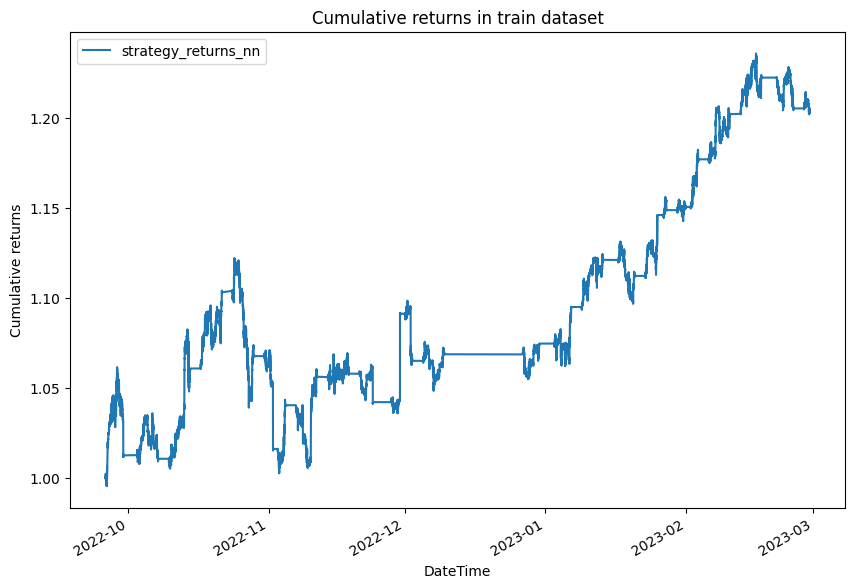

In [129]:
plt.title("Cumulative returns in train dataset")

# Plotting the cumulative returns for neural network in train dataset
(nq_ret.strategy_returns_nn[:train_length]+1).cumprod().plot(figsize=(10,7))
plt.ylabel('Cumulative returns')
# Show the legend
plt.legend()

# Show the graph
plt.show()

- Plotting the cumulative returns for neural network in test dataset

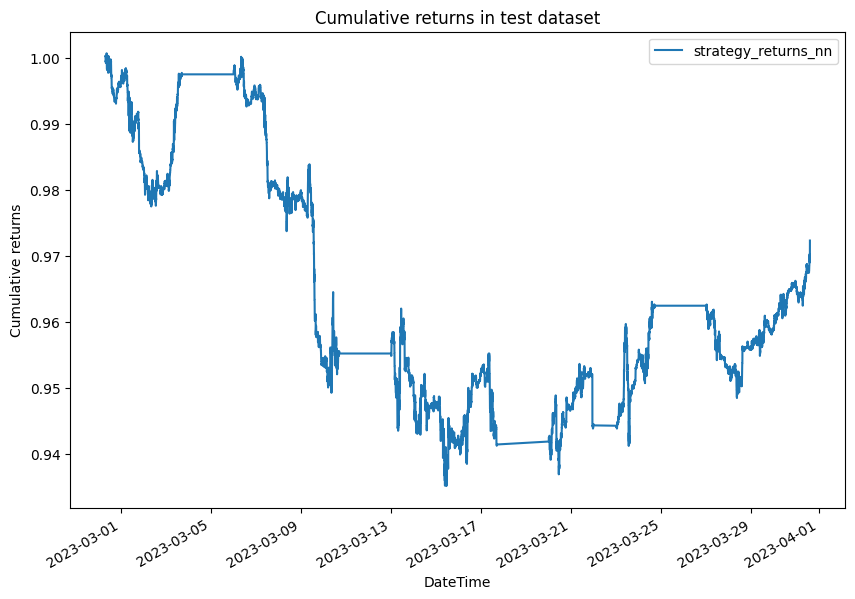

In [130]:
# Plotting the cumulative returns for neural network in test dataset
plt.title("Cumulative returns in test dataset")
(nq_ret.strategy_returns_nn[train_length:]+1).cumprod().plot(figsize=(10, 7))
plt.ylabel('Cumulative returns')
# Show the legend
plt.legend()

# Show the graph
plt.show()

### Strategy Results

In [131]:
from tabulate import tabulate

print(tabulate(
    [
        ['CAGR', ret_train_nn, ret_test_nn],
        ['Sharpe Ratio', sharpe_train_nn, sharpe_test_nn],
    ],
    headers=['Train', 'Test'],
    tablefmt='orgtbl'))

|              |      Train |       Test |
|--------------+------------+------------|
| CAGR         |  0.0795192 | -0.0481398 |
| Sharpe Ratio | -5.96217   | -8.74008   |


### Accuracy of the neural network classifier

In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mlp.predict(X_test)))

              precision    recall  f1-score   support

           0       0.51      0.80      0.62      7470
           1       0.49      0.20      0.28      7209

    accuracy                           0.50     14679
   macro avg       0.50      0.50      0.45     14679
weighted avg       0.50      0.50      0.45     14679



In [134]:
es1 = es.copy()
es1.head()

,BidAsk,Down,Range,RangeDown,RangeUp,Up,close,high,low,open,volume
DateTime,,,,,,,,,,,
2022-09-19 00:00:00,65,0,0,0,0,1,3883.25,3883.25,3882.00,3882.00,170
2022-09-19 00:02:00,-5,0,0,0,0,1,3882.75,3883.25,3882.50,3883.25,127
2022-09-19 00:04:00,6,0,0,0,0,1,3882.50,3883.75,3882.50,3883.00,167
2022-09-19 00:06:00,7,0,0,0,0,1,3881.75,3883.00,3881.75,3882.75,102
2022-09-19 00:08:00,-37,0,0,0,0,1,3881.00,3882.00,3881.00,3882.00,104


-Filter the DataFrame to keep only the rows between 9:30 and 10:30.
- Resample the data into hourly intervals and aggregate the features.
- Create a target variable with the TypeOfDay information.
- Split the data into training and testing sets.
- Train a machine learning model (e.g., a Random Forest classifier) on the training set.
- Evaluate the model's performance on the testing set. 

In [140]:
def check_Nan_Inf(df):
    nan_columns = df.isna().any()
    # Count the number of NaN values per column
    nan_count = nan_columns.isna().sum()
    # Total number of NaN values in the entire DataFrame
    total_nan_count = nan_count.sum()
    print("\nTotal number of NaN values in the DataFrame:", total_nan_count)

    # Deal w Inf values
    mask = df.isin([np.inf, -np.inf])
    inf_count = mask.values.sum()
    # print the mask and the number of infinite values
    # print(mask)
    print(f'Total number of infinite values: {inf_count}') #    1830
    nq_centered = df.replace([np.inf, -np.inf], np.finfo(np.float64).max)
    print(f'Total number of infinite values: {inf_count}') #    0
    return df

In [136]:

nan_columns = es1.isna().any()
# Count the number of NaN values per column
nan_count = nan_columns.isna().sum()
# Total number of NaN values in the entire DataFrame
total_nan_count = nan_count.sum()
print("\nTotal number of NaN values in the DataFrame:", total_nan_count)

# Deal w Inf values
mask = es1.isin([np.inf, -np.inf])
inf_count = mask.values.sum()
# print the mask and the number of infinite values
# print(mask)
print(f'Total number of infinite values: {inf_count}') #    1830
nq_centered = es1.replace([np.inf, -np.inf], np.finfo(np.float64).max)
print(f'Total number of infinite values: {inf_count}') #    0



Total number of NaN values in the DataFrame: 0
Total number of infinite values: 0
Total number of infinite values: 0


In [141]:
check_Nan_Inf(X_train)


Total number of NaN values in the DataFrame: 0
Total number of infinite values: 0
Total number of infinite values: 0


,BidAsk,close,high,low,open,volume
DateTime,,,,,,
2022-12-31 10:00:00,NaN,NaN,NaN,NaN,NaN,0
2022-09-28 15:00:00,NaN,NaN,NaN,NaN,NaN,0
2023-01-14 20:00:00,NaN,NaN,NaN,NaN,NaN,0
2022-11-20 12:00:00,NaN,NaN,NaN,NaN,NaN,0
2022-10-13 06:00:00,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...
2023-03-22 19:00:00,NaN,NaN,NaN,NaN,NaN,0
2022-10-08 19:00:00,NaN,NaN,NaN,NaN,NaN,0
2023-01-26 05:00:00,NaN,NaN,NaN,NaN,NaN,0


In [219]:
pd.set_option('display.max_rows', 300) 


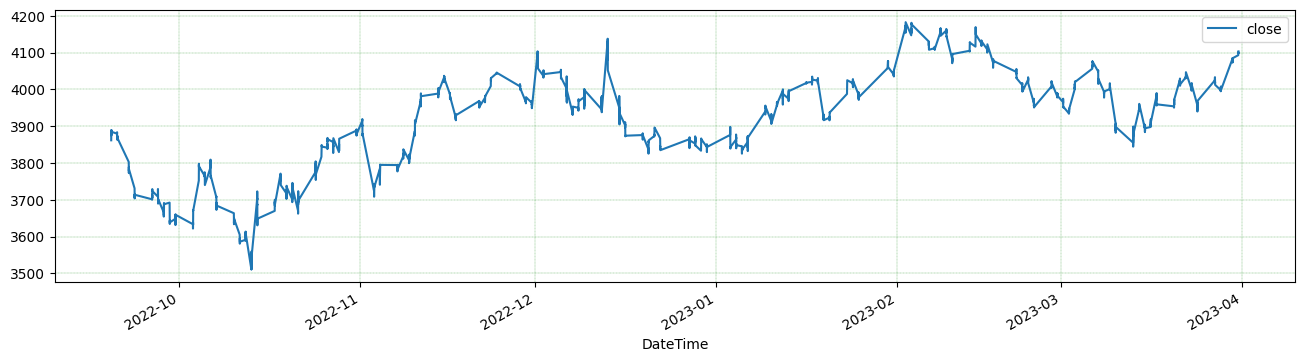

In [149]:
# df_filtered['2022-9-29 04:20:00':'2022-9-29 16:20:00'].plot(y=['close','BA_2m','BA_5m','BA_10m', 'BA_cs'],figsize=(16,4))
df_filtered.plot(y=['close'],figsize=(16,4))
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2) 
plt.show()

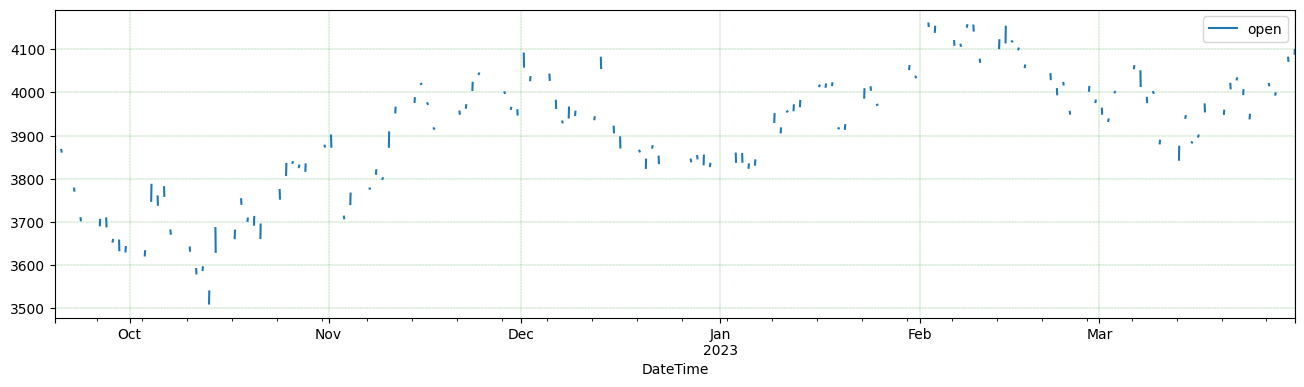

In [157]:
df_hourly.plot(y=['open'],figsize=(16,4))
# plt.axhline(y= 0, linewidth= 0.9, linestyle = '--', color='black', alpha=0.7)  
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2) 
plt.show()

In [221]:
es1.columns

Index(['BidAsk', 'Down', 'Range', 'RangeDown', 'RangeUp', 'Up', 'close',
       'high', 'low', 'open', 'volume', 'TypeOfDay'],
      dtype='object')

In [222]:
es1['2022-9-29 04:20:00':'2022-9-29 16:20:00']

,BidAsk,Down,Range,RangeDown,RangeUp,Up,close,high,low,open,volume,TypeOfDay
DateTime,,,,,,,,,,,,
2022-09-29 04:20:00,0,0,0,1,0,0,3691.50,3694.75,3690.75,3694.25,1110,Down
2022-09-29 04:22:00,89,0,0,1,0,0,3691.75,3693.50,3690.75,3691.50,797,None
2022-09-29 04:24:00,-38,0,0,1,0,0,3687.75,3692.00,3687.25,3691.50,1296,Down
2022-09-29 04:26:00,8,0,0,1,0,0,3691.00,3691.50,3687.50,3687.75,785,None
2022-09-29 04:28:00,-42,0,0,1,0,0,3688.25,3691.50,3688.25,3691.25,618,Down
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29 16:12:00,-42,0,0,1,0,0,3657.75,3658.50,3656.75,3657.50,3448,None
2022-09-29 16:14:00,-306,0,0,1,0,0,3656.25,3658.25,3656.00,3657.50,3124,Down
2022-09-29 16:16:00,35,0,0,1,0,0,3656.50,3657.50,3656.00,3656.00,761,None


In [235]:
def get_type_of_day(row):
    # Replace the conditions with your own criteria
    # d = ['Down' if v is 1 else 'Range' if v is False else 'unknown' for v in values]
    # if row['close'] - row['open'] < 0:
    if row['Down'] == 1:   
        return 'Down'
    elif row['Range'] == 1:
        return 'Range'
    elif row['RangeDown'] == 1:
        return 'RangeDown'
    elif row['RangeUp'] == 1:
        return 'RangeUp'
    elif row['Up'] == 1:
        return 'Up'
    return 'Unknown'

# es1['TypeOfDay'] = es1.apply(get_type_of_day, axis=1)

In [280]:
type(es1['TypeOfDay_encoded'])
es1['TypeOfDay_encoded'] 

pandas.core.series.Series

In [236]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1a: Filter data to only include the first hour of trading
es1 = es1.between_time('9:30', '10:30')
   
es1['TypeOfDay'] = es1.apply(get_type_of_day, axis=1)

# Step 1c: Encode the TypeOfDay column using LabelEncoder
encoder = LabelEncoder()
es1['TypeOfDay_encoded'] = encoder.fit_transform(es1['TypeOfDay'])

# Step 2: Split the dataset into training and testing sets
X = es1[['BidAsk', 'close', 'high', 'low', 'open', 'volume']]
y = es1['TypeOfDay_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a machine learning model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 4: Evaluate the accuracy of the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 47.86%


In [237]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 4: Evaluate the accuracy of the model
y_pred = model.predict(X_test)

# Compute additional metrics
report = classification_report(y_test, y_pred, target_names= encoder.classes_)
conf_mat = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(report)
print("Confusion Matrix:")
print(conf_mat)


Accuracy: 47.86%

Classification Report:
              precision    recall  f1-score   support

        Down       0.53      0.42      0.47       153
       Range       0.53      0.60      0.56       208
   RangeDown       0.46      0.46      0.46       156
     RangeUp       0.36      0.40      0.38       117
          Up       0.48      0.46      0.47       185

    accuracy                           0.48       819
   macro avg       0.47      0.47      0.47       819
weighted avg       0.48      0.48      0.48       819

Confusion Matrix:
[[ 65  27   8  20  33]
 [ 10 124  24  30  20]
 [ 17  29  71  14  25]
 [ 16  19  22  47  13]
 [ 15  35  30  20  85]]


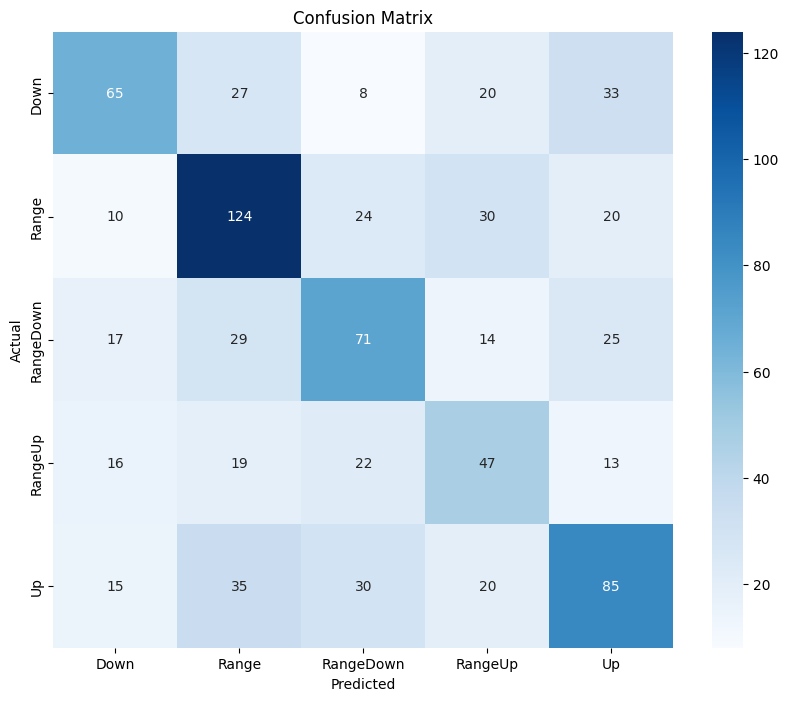

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels= encoder.classes_, yticklabels= encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### XGBClassifier

In [240]:

from xgboost import XGBClassifier

# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder= False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Evaluate the accuracy of the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy (XGBoost): {accuracy_xgb * 100:.2f}%")

# Compute additional metrics
report_xgb = classification_report(y_test, y_pred_xgb, target_names=encoder.classes_)
conf_mat_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print the metrics
print("\nClassification Report (XGBoost):")
print(report_xgb)
print("Confusion Matrix (XGBoost):")
print(conf_mat_xgb)


Accuracy (XGBoost): 45.79%

Classification Report (XGBoost):
              precision    recall  f1-score   support

        Down       0.51      0.43      0.47       153
       Range       0.49      0.57      0.53       208
   RangeDown       0.44      0.48      0.46       156
     RangeUp       0.34      0.32      0.33       117
          Up       0.46      0.42      0.44       185

    accuracy                           0.46       819
   macro avg       0.45      0.44      0.45       819
weighted avg       0.46      0.46      0.46       819

Confusion Matrix (XGBoost):
[[ 66  33   5  13  36]
 [ 13 119  25  36  15]
 [ 17  28  75   9  27]
 [ 17  22  27  37  14]
 [ 16  39  37  15  78]]


c:\Users\tonya\anaconda3\envs\quantra_py\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


### SVM

In [241]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM classifier
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Evaluate the accuracy of the SVM model
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM): {accuracy_svm * 100:.2f}%")

# Compute additional metrics
report_svm = classification_report(y_test, y_pred_svm, target_names=encoder.classes_)
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)

# Print the metrics
print("\nClassification Report (SVM):")
print(report_svm)
print("Confusion Matrix (SVM):")
print(conf_mat_svm)


Accuracy (SVM): 33.70%

Classification Report (SVM):
              precision    recall  f1-score   support

        Down       0.41      0.21      0.28       153
       Range       0.32      0.52      0.39       208
   RangeDown       0.32      0.41      0.36       156
     RangeUp       0.28      0.08      0.12       117
          Up       0.38      0.34      0.36       185

    accuracy                           0.34       819
   macro avg       0.34      0.31      0.30       819
weighted avg       0.34      0.34      0.32       819

Confusion Matrix (SVM):
[[ 32  71  29   7  14]
 [ 20 108  42   8  30]
 [  3  54  64   4  31]
 [ 14  44  24   9  26]
 [ 10  65  43   4  63]]


## ANN 

In [243]:
# pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [252]:

# One-hot encode the target variable
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes= len(encoder.classes_))
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes= len(encoder.classes_))

# Create a feedforward neural network
ann_model1 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(len(encoder.classes_), activation='softmax')
])

# Compile the model with the Adam optimizer
ann_model1.compile(optimizer=Adam(learning_rate=0.002), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
ann_model1.fit(X_train_scaled, y_train_onehot, epochs=300, batch_size=32, verbose=0)

# Evaluate the accuracy of the ANN model
accuracy_ann1 = ann_model1.evaluate(X_test_scaled, y_test_onehot, verbose=0)[1]
print(f"Accuracy (ANN): {accuracy_ann1 * 100:.2f}%")

# Compute additional metrics
y_pred_ann1 = np.argmax(ann_model1.predict(X_test_scaled), axis=-1)
report_ann1 = classification_report(y_test, y_pred_ann1, target_names= encoder.classes_)
conf_mat_ann1 = confusion_matrix(y_test, y_pred_ann1)

# Print the metrics
print("\nClassification Report (ANN):")
print(report_ann1)
print("Confusion Matrix (ANN):")
print(conf_mat_ann1)


Accuracy (ANN): 39.07%

Classification Report (ANN):
              precision    recall  f1-score   support

        Down       0.45      0.35      0.40       153
       Range       0.40      0.43      0.41       208
   RangeDown       0.36      0.49      0.42       156
     RangeUp       0.39      0.26      0.32       117
          Up       0.37      0.37      0.37       185

    accuracy                           0.39       819
   macro avg       0.40      0.38      0.38       819
weighted avg       0.39      0.39      0.39       819

Confusion Matrix (ANN):
[[54 39 32  9 19]
 [22 89 37 19 41]
 [10 28 77 11 30]
 [15 26 18 31 27]
 [19 40 48  9 69]]


In [ ]:
from tensorflow.keras.layers import Dropout

# Create a feedforward neural network with dropout layers
ann_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(encoder.classes_), activation='softmax')
])

# Compile the model with the Adam optimizer
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for more epochs and with a smaller batch size
ann_model.fit(X_train_scaled, y_train_onehot, epochs=200, batch_size=8, verbose=1)

# Evaluate the accuracy and other metrics 
# Print the metrics
print("\nClassification Report (ANN):")
print(report_ann)
print("Confusion Matrix (ANN):")
print(conf_mat_ann)


Classification Report (ANN):
      -  precision   - recall  - f1-score  - support

   - Down    -   0.39    -  0.40     - 0.40  -     153
   - Range    -   0.32    -  0.38   -   0.35    -   208
   - RangeDown  -     0.32   -   0.40  -    0.35   -    156
   - RangeUp   -    0.32   -   0.20    -  0.24    -   117
   - Up     -  0.37    -  0.31   -   0.34    -   185

    - accuracy       -        -      -      0.34    -   819
   - macro avg    -   0.35  -    0.34   -   0.34   -    819
- weighted avg   -    0.35   -   0.34   -   0.34    -   819

Confusion Matrix (ANN):
 - [[61 39 25 15 13]
 - [40 78 38 21 31]
 - [ 9 50 62  7 28]
 - [21 28 20 23 25]
 - [24 46 51  6 58]]

- relu function
- sigmoid function
- softmax function
- softplus function
- softsign function
- tanh function
- selu function
- elu function
- exponential function

In [260]:
from tensorflow.keras.layers import Dropout

# Create a feedforward neural network with dropout layers
ann_model3 = Sequential([
    Dense(32, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(len(encoder.classes_), activation='softplus')
])

# Compile the model with the Adam optimizer
ann_model3.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for more epochs and with a smaller batch size
ann_model3.fit(X_train_scaled, y_train_onehot, epochs=100, batch_size= 8, verbose=1)


# Compute additional metrics
y_pred_ann3 = np.argmax(ann_model3.predict(X_test_scaled), axis=-1)
report_ann3 = classification_report(y_test, y_pred_ann3, target_names= encoder.classes_)
conf_mat_ann3 = confusion_matrix(y_test, y_pred_ann3)


# Evaluate the accuracy and other metrics 
# Print the metrics
print("\nClassification Report (ANN):")
print(report_ann3)
print("Confusion Matrix (ANN):")
print(conf_mat_ann3)

Epoch 1/100
410/410 [==============================] - 1s 821us/step - loss: 1.6070 - accuracy: 0.2423
Epoch 2/100
410/410 [==============================] - 0s 881us/step - loss: 1.5683 - accuracy: 0.2548
Epoch 3/100
410/410 [==============================] - 0s 949us/step - loss: 1.5523 - accuracy: 0.2783
Epoch 4/100
410/410 [==============================] - 0s 847us/step - loss: 1.5454 - accuracy: 0.2783
Epoch 5/100
410/410 [==============================] - 0s 790us/step - loss: 1.5438 - accuracy: 0.2848
Epoch 6/100
410/410 [==============================] - 0s 769us/step - loss: 1.5417 - accuracy: 0.2854
Epoch 7/100
410/410 [==============================] - 0s 862us/step - loss: 1.5426 - accuracy: 0.2863
Epoch 8/100
410/410 [==============================] - 0s 809us/step - loss: 1.5347 - accuracy: 0.2796
Epoch 9/100
410/410 [==============================] - 0s 1ms/step - loss: 1.5264 - accuracy: 0.2958
Epoch 10/100
410/410 [==============================] - 0s 1ms/step - loss:

In [263]:
# Create a feedforward neural network with dropout layers
ann_model3 = Sequential([
    Dense(32, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(len(encoder.classes_), activation='softplus')
])

# Compile the model with the Adam optimizer
# ann_model3.compile(optimizer=Adam(learning_rate=0.005), loss='categorical_crossentropy', metrics=['accuracy'])
ann_model3.compile(optimizer=Adam(learning_rate=0.009), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for more epochs and with a smaller batch size
# ann_model3.fit(X_train_scaled, y_train_onehot, epochs=300, batch_size= 8, verbose=1)
ann_model3.fit(X_train_scaled, y_train_onehot, epochs=400, batch_size= 6, verbose=1)

# Compute additional metrics
y_pred_ann3 = np.argmax(ann_model3.predict(X_test_scaled), axis=-1)
report_ann3 = classification_report(y_test, y_pred_ann3, target_names= encoder.classes_)
conf_mat_ann3 = confusion_matrix(y_test, y_pred_ann3)


# Evaluate the accuracy and other metrics 
# Print the metrics
print("\nClassification Report (ANN):")
print(report_ann3)
print("Confusion Matrix (ANN):")
print(conf_mat_ann3)

Epoch 1/400
546/546 [==============================] - 1s 806us/step - loss: 1.5800 - accuracy: 0.2582
Epoch 2/400
546/546 [==============================] - 0s 781us/step - loss: 1.5539 - accuracy: 0.2713
Epoch 3/400
546/546 [==============================] - 0s 798us/step - loss: 1.5455 - accuracy: 0.2728
Epoch 4/400
546/546 [==============================] - 0s 832us/step - loss: 1.5427 - accuracy: 0.2851
Epoch 5/400
546/546 [==============================] - 0s 792us/step - loss: 1.5341 - accuracy: 0.2872
Epoch 6/400
546/546 [==============================] - 0s 812us/step - loss: 1.5299 - accuracy: 0.2875
Epoch 7/400
546/546 [==============================] - 1s 992us/step - loss: 1.5321 - accuracy: 0.2924
Epoch 8/400
546/546 [==============================] - 0s 818us/step - loss: 1.5296 - accuracy: 0.3061
Epoch 9/400
546/546 [==============================] - 0s 812us/step - loss: 1.5197 - accuracy: 0.3061
Epoch 10/400
546/546 [==============================] - 0s 796us/step - l

# DecsionTree

In [281]:

# Step 1a: Filter data to only include the first hour of trading
es1 = es1.between_time('9:30', '10:30')
   
es1['TypeOfDay'] = es1.apply(get_type_of_day, axis=1)

# Step 1c: Encode the TypeOfDay column using LabelEncoder
encoder = LabelEncoder()
es1['TypeOfDay_encoded'] = encoder.fit_transform(es1['TypeOfDay'])

# Step 2: Split the dataset into training and testing sets
X = es1[['BidAsk', 'close', 'high', 'low', 'open', 'volume']]
y = es1['TypeOfDay_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#------------------------

# Apply the function to create a new column 'TypeOfDay'
es1['TypeOfDay'] = es1.apply(get_type_of_day, axis=1)


# Extract features for the first hour of trading for each day
# first_hour_data = es1.between_time('09:30:00', '10:30:00').resample('D').agg({'BidAsk': 'mean', 'close': 'mean', 
                                                                            #   'high': 'max', 'low': 'min', 'open': 'first', 'volume': 'sum'})
# Train a DecisionTreeClassifier model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the types of day for the test dataset
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))


Accuracy: 0.43


In [316]:

# Step 1a: Filter data to only include the first hour of trading
es1 = es1.between_time('9:30', '10:30')
   
es1['TypeOfDay'] = es1.apply(get_type_of_day, axis=1)

# Step 1c: Encode the TypeOfDay column using LabelEncoder
encoder = LabelEncoder()
es1['TypeOfDay_encoded'] = encoder.fit_transform(es1['TypeOfDay'])

# Step 2: Split the dataset into training and testing sets
X = es1[['BidAsk', 'close', 'high', 'low', 'open', 'volume']]
y = es1['TypeOfDay_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Apply the function to create a new column 'TypeOfDay'
es1['TypeOfDay'] = es1.apply(get_type_of_day, axis=1)


# Train a DecisionTreeClassifier model
clf = DecisionTreeClassifier(random_state=42)
#-------------------------------------------------
# Set up the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 11),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 6)
}

# Perform GridSearchCV to find the optimal hyperparameters
grid_search = GridSearchCV(clf, param_grid, scoring='f1_macro', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

#-----------------------------------
clf.fit(X_train, y_train)

# Predict the types of day for the test dataset
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))


Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy: 0.43


Accuracy: 0.47
Precision: 0.47
Recall: 0.47
F1-score: 0.47

Classification Report:

              precision    recall  f1-score   support

        Down       0.46      0.41      0.44       153
       Range       0.52      0.55      0.53       208
   RangeDown       0.42      0.53      0.47       156
     RangeUp       0.43      0.37      0.39       117
          Up       0.49      0.44      0.46       185

    accuracy                           0.47       819
   macro avg       0.46      0.46      0.46       819
weighted avg       0.47      0.47      0.47       819



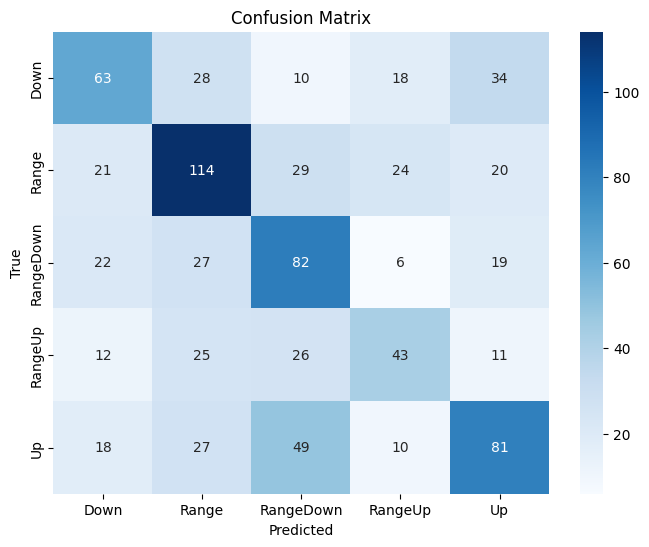

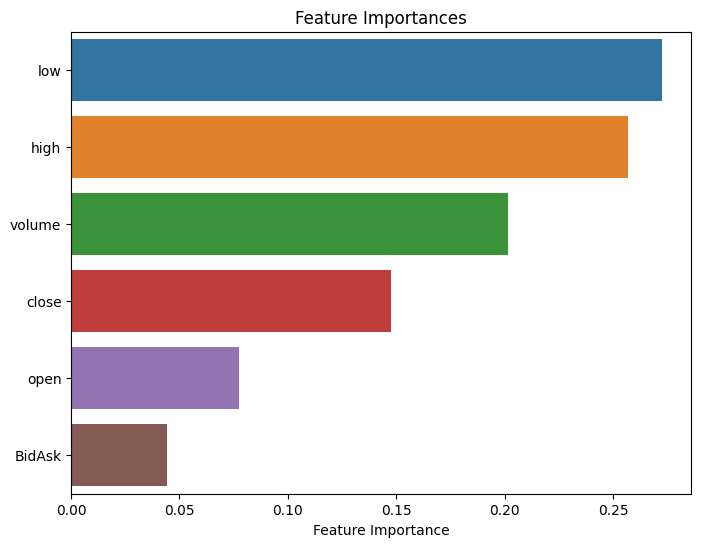

In [318]:

# Predict the types of day for the test dataset
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1_score))

# Print the classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importances
feature_importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()
